In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def S(t,n):
    t = t.flatten()
    r = np.sign(t) * np.maximum(np.abs(t) - n, 0)
    r = r.reshape((-1,1))
    return r

# Initialize
L = np.zeros((999, 1000))
for i in range(999):
    L[i, i] = 1
    L[i, i+1] = -1
L *= 999

f = np.genfromtxt('noisy_signal.csv', delimiter=',')
f = f.reshape((-1,1))
x = f.copy()
y = L@x
z = np.ones((len(y),1))
lambda_ = 10**(-2)
omega = 2*10**(-3)
x_tol = 10**(-5)
max_iter = 1e4


L

array([[ 999., -999.,    0., ...,    0.,    0.,    0.],
       [   0.,  999., -999., ...,    0.,    0.,    0.],
       [   0.,    0.,  999., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ..., -999.,    0.,    0.],
       [   0.,    0.,    0., ...,  999., -999.,    0.],
       [   0.,    0.,    0., ...,    0.,  999., -999.]])

In [3]:
stop = False
it = 0
A = np.eye(len(x)) + lambda_ * L.T @ L
A_inv = np.linalg.inv(A)

while not stop:
    it += 1
    if it%50==0:
        print(f"iteration {it}")

    x_old = x
    x = A_inv@(f + lambda_*L.T@(y-z))
    y = S(L@x + z, omega/lambda_)
    z += L@x - y
    if np.linalg.norm(x - x_old)/np.linalg.norm(x)<x_tol:
        break

    if it >= 10**5:
        print('high it')
        break

iteration 50
iteration 100
iteration 150
iteration 200
iteration 250
iteration 300
iteration 350
iteration 400
iteration 450
iteration 500
iteration 550
iteration 600
iteration 650
iteration 700
iteration 750
iteration 800
iteration 850
iteration 900
iteration 950
iteration 1000


In [4]:
print(f"number of iterations = {it}")

number of iterations = 1042


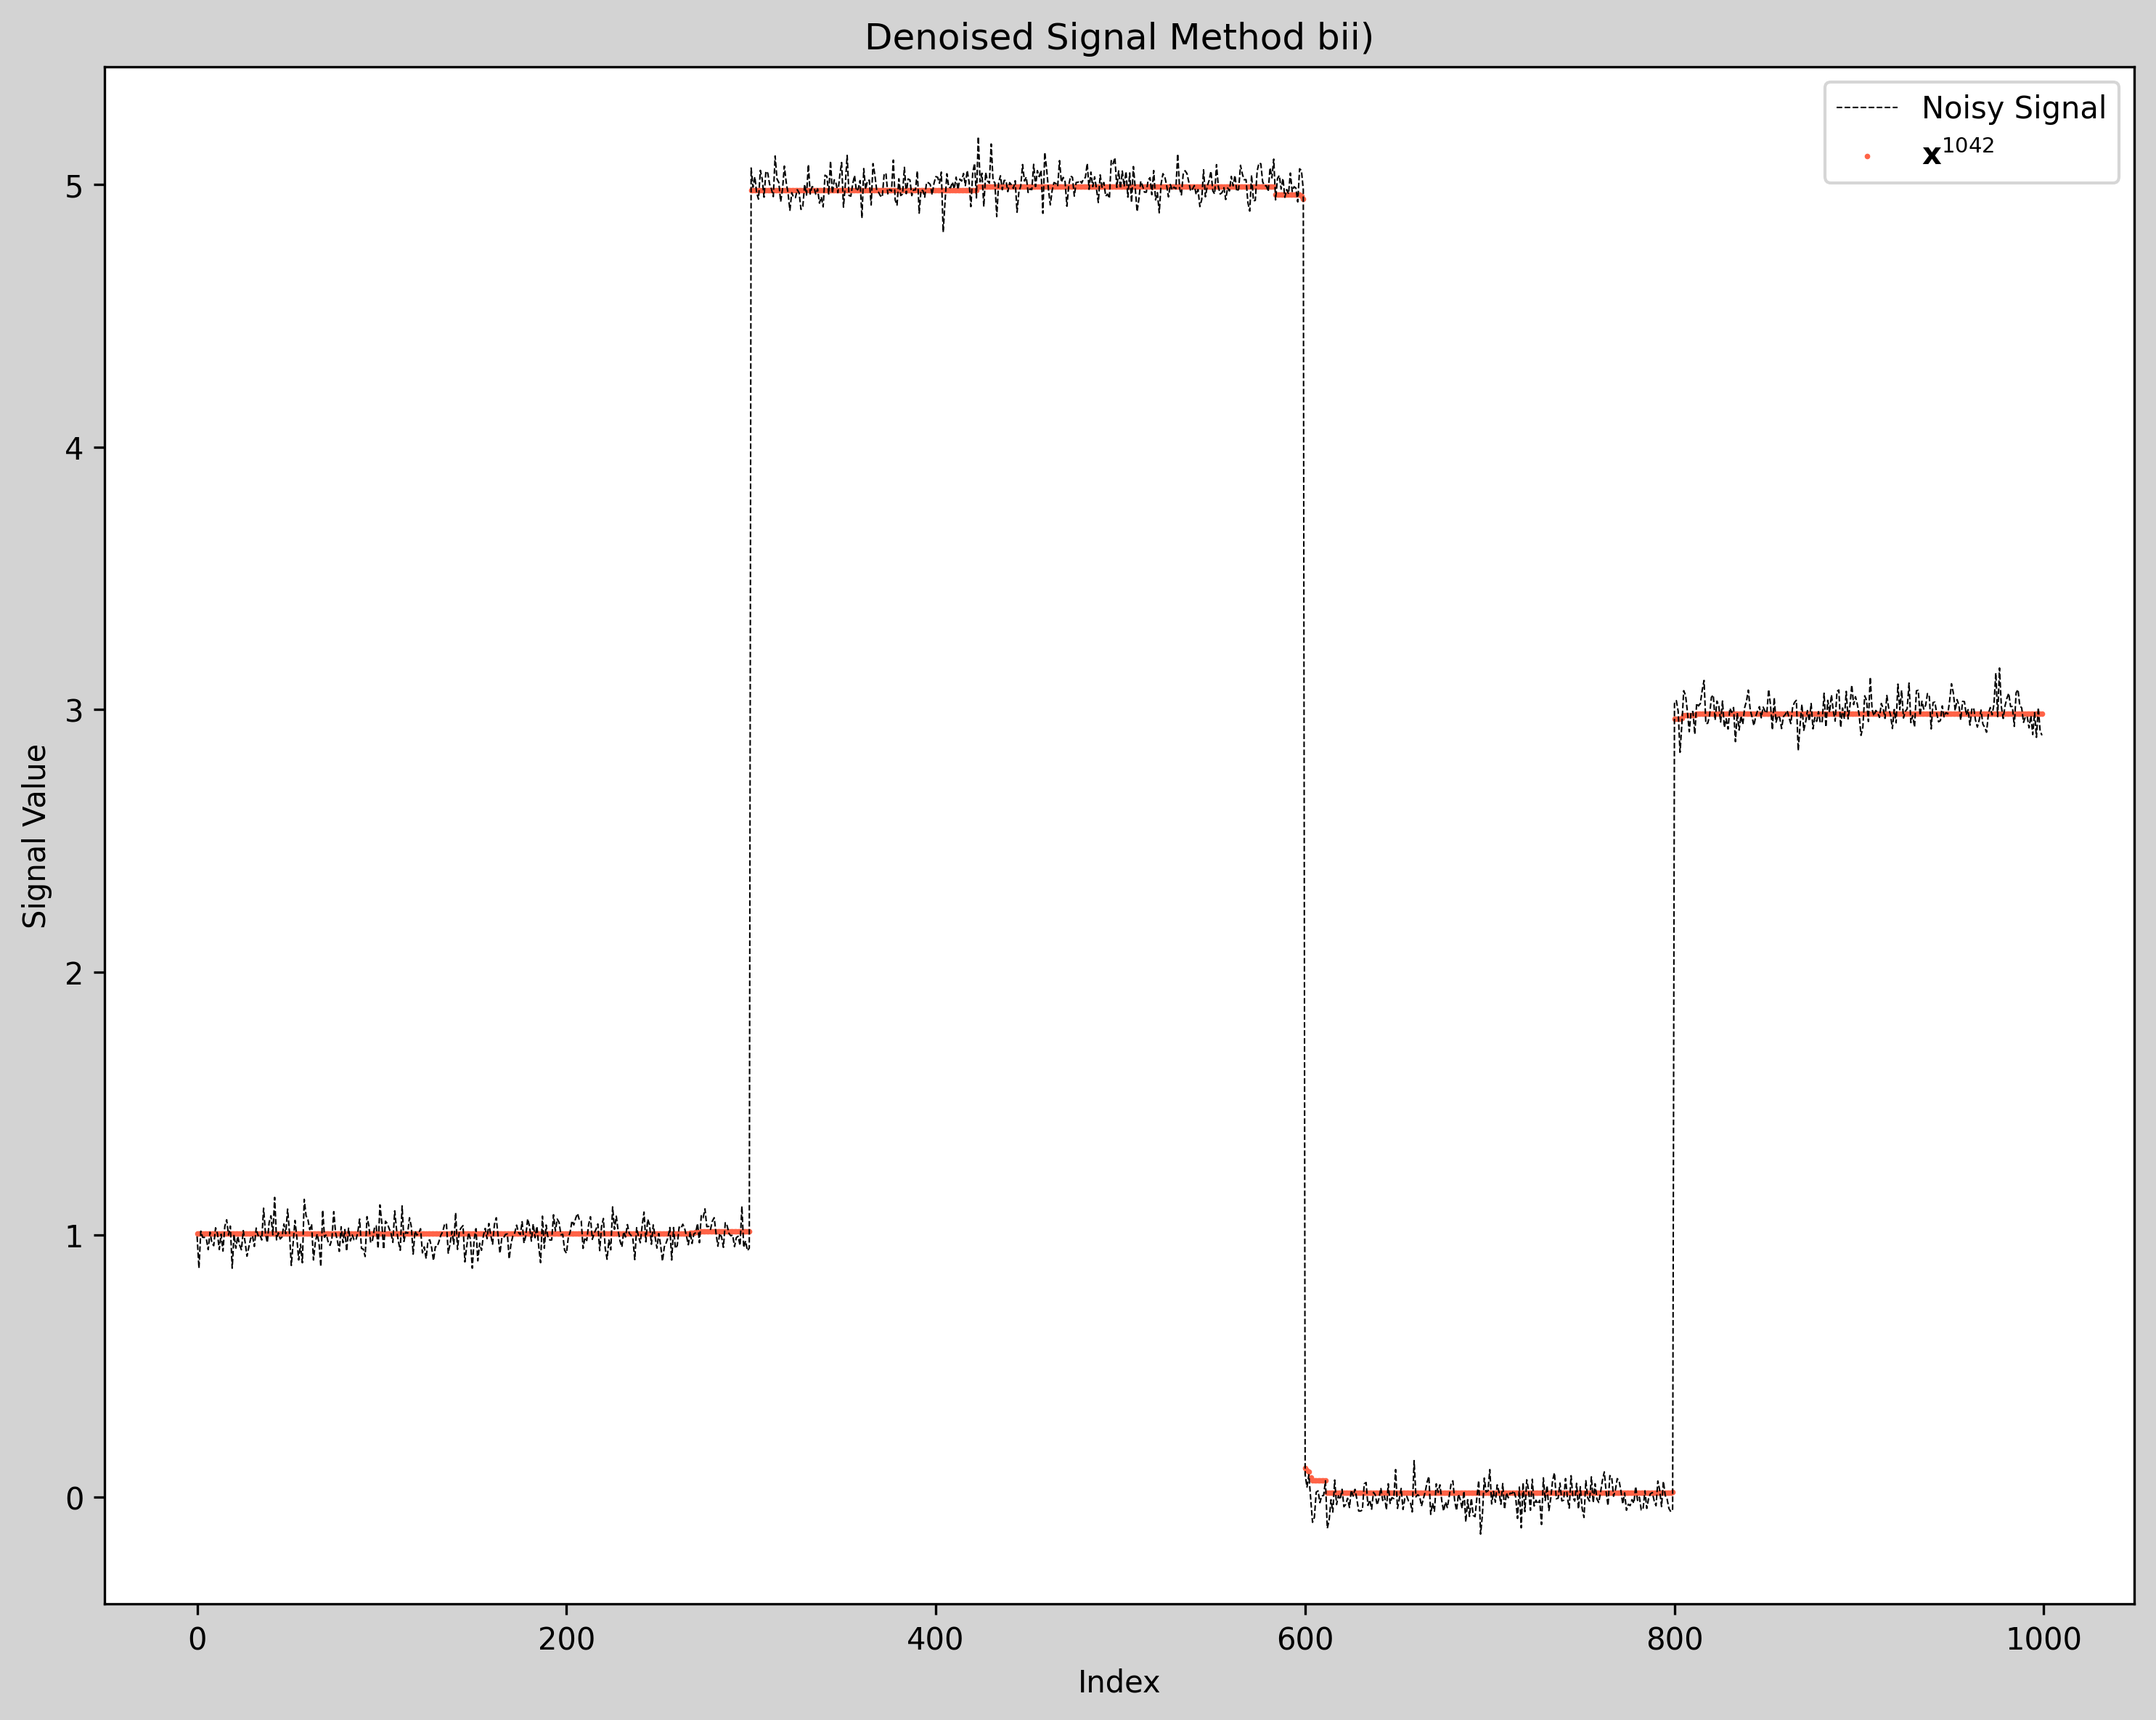

In [6]:
plt.figure(figsize=(10,8), facecolor='lightgray', dpi=300)
plt.title("Denoised Signal Method bii)")
plt.plot(f, lw=0.5, linestyle='--', color='k', label='Noisy Signal')
plt.scatter(np.arange(len(x)), x, s=0.7, label='$\mathbf{x}^{1042}$', color='tomato')
plt.ylabel("Signal Value")
plt.xlabel("Index")
plt.legend()
plt.tight_layout()
plt.savefig("bii.png")
plt.show()